# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
x = np.arange(3.1, 20, 0.2)

In [3]:
# Наша функция
y = (np.sin(2*x) * x) + np.random.rand(x.size) * 0.2

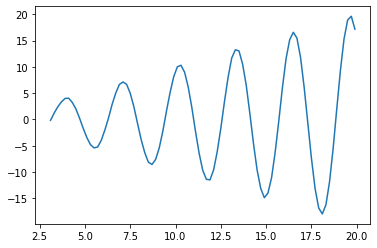

In [4]:
plt.plot(x, y)

In [5]:
len(x)

85

In [6]:
raw_dataset = pd.DataFrame.from_dict(dict(zip(x.tolist(), y.tolist())), orient='index').reset_index()
raw_dataset.columns = ['x', 'y']
raw_dataset = raw_dataset[["y", "x"]]
raw_dataset.head(5)

,y,x
0,-0.165349,3.1
1,1.217487,3.3
2,2.404158,3.5
3,3.345047,3.7
4,3.996026,3.9


In [7]:
def create_shifted_df(df,shift):
    shifted_df = pd.concat([df, df.shift(shift)[['y']]], axis=1)
    shifted_df.columns = ["y", "x", "y_"+str(shift)]
    shifted_df = shifted_df[["y_"+str(shift)]]
    return shifted_df.dropna()

In [8]:
test_df = raw_dataset
for i in range(1, 6):
    test_df = pd.concat([test_df, create_shifted_df(raw_dataset, i)], axis=1)

In [9]:
test_df = test_df.dropna()
test_df.head(5)

,y,x,y_1,y_2,y_3,y_4,y_5
5,4.047101,4.1,3.996026,3.345047,2.404158,1.217487,-0.165349
6,3.241412,4.3,4.047101,3.996026,3.345047,2.404158,1.217487
7,1.999863,4.5,3.241412,4.047101,3.996026,3.345047,2.404158
8,0.268352,4.7,1.999863,3.241412,4.047101,3.996026,3.345047
9,-1.643237,4.9,0.268352,1.999863,3.241412,4.047101,3.996026


In [10]:
test_df.shape

(80, 7)

In [11]:
test_df.tail(5)

,y,x,y_1,y_2,y_3,y_4,y_5
80,9.305892,19.1,2.052720,-5.453945,-11.832672,-16.220601,-17.938274
81,15.304517,19.3,9.305892,2.052720,-5.453945,-11.832672,-16.220601
82,18.910674,19.5,15.304517,9.305892,2.052720,-5.453945,-11.832672
83,19.614028,19.7,18.910674,15.304517,9.305892,2.052720,-5.453945
84,17.171458,19.9,19.614028,18.910674,15.304517,9.305892,2.052720


In [12]:
y = test_df.y
y.head(3)

5    4.047101
6    3.241412
7    1.999863
Name: y, dtype: float64

In [13]:
X = test_df.drop(['y'], axis=1)
X.columns = ["x","y1","y2","y3","y4","y5"]
X.head(3)

,x,y1,y2,y3,y4,y5
5,4.1,3.996026,3.345047,2.404158,1.217487,-0.165349
6,4.3,4.047101,3.996026,3.345047,2.404158,1.217487
7,4.5,3.241412,4.047101,3.996026,3.345047,2.404158


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

In [15]:
X_train.shape

(53, 6)

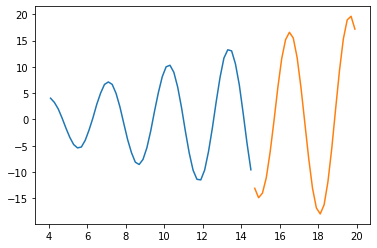

In [16]:
plt.plot(X_train.x, y_train)
plt.plot(X_test.x, y_test)

# Modeling

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations

In [18]:
# [samples, time steps, features]
ds = tf.keras.preprocessing.timeseries_dataset_from_array(data=X_train.drop(['x'], axis=1), # x was droped
                                                     targets=y_train,
                                                    sequence_length=1)
x, y = next(iter(ds))
x.shape[1:]

TensorShape([1, 5])

In [19]:
model = tf.keras.models.Sequential()
model.add(layers.LSTM(700, input_shape=x.shape[1:], activation='tanh', return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 700)            1976800   
_________________________________________________________________
dropout (Dropout)            (None, 1, 700)            0         
_________________________________________________________________
dense (Dense)                (None, 1, 1)              701       
Total params: 1,977,501
Trainable params: 1,977,501
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='mean_squared_error', optimizer="adam", metrics="mean_absolute_error")

In [21]:
l_history = model.fit(x, y, epochs=7000)

Epoch 1/7000
2/2 [==============================] - 2s 17ms/step - loss: 45.4437 - mean_absolute_error: 5.8259
Epoch 2/7000
2/2 [==============================] - 0s 15ms/step - loss: 41.7288 - mean_absolute_error: 5.5713
Epoch 3/7000
2/2 [==============================] - 0s 16ms/step - loss: 37.9202 - mean_absolute_error: 5.2273
Epoch 4/7000
2/2 [==============================] - 0s 15ms/step - loss: 33.7922 - mean_absolute_error: 4.9745
Epoch 5/7000
2/2 [==============================] - 0s 16ms/step - loss: 33.1779 - mean_absolute_error: 4.9950
Epoch 6/7000
2/2 [==============================] - 0s 17ms/step - loss: 28.2936 - mean_absolute_error: 4.5483
Epoch 7/7000
2/2 [==============================] - 0s 15ms/step - loss: 24.9072 - mean_absolute_error: 4.2216
Epoch 8/7000
2/2 [==============================] - 0s 17ms/step - loss: 24.8024 - mean_absolute_error: 4.2890
Epoch 9/7000
2/2 [==============================] - 0s 16ms/step - loss: 20.7606 - mean_absolute_error: 3.8875
E

2/2 [==============================] - 0s 15ms/step - loss: 0.0845 - mean_absolute_error: 0.2410
Epoch 148/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0848 - mean_absolute_error: 0.2246
Epoch 149/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0997 - mean_absolute_error: 0.2377
Epoch 150/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.1071 - mean_absolute_error: 0.2647
Epoch 151/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0997 - mean_absolute_error: 0.2469
Epoch 152/7000
2/2 [==============================] - 0s 15ms/step - loss: 0.0843 - mean_absolute_error: 0.2286
Epoch 153/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0742 - mean_absolute_error: 0.2327
Epoch 154/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0747 - mean_absolute_error: 0.2091
Epoch 155/7000
2/2 [==============================] - 0s 15ms/step - loss: 0.0876 - mean_absolute_error: 0.2146
Epoch 1

2/2 [==============================] - 0s 14ms/step - loss: 0.0369 - mean_absolute_error: 0.1430
Epoch 293/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0485 - mean_absolute_error: 0.1716
Epoch 294/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0788 - mean_absolute_error: 0.2110
Epoch 295/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0823 - mean_absolute_error: 0.2178
Epoch 296/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0414 - mean_absolute_error: 0.1574
Epoch 297/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0338 - mean_absolute_error: 0.1427
Epoch 298/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0513 - mean_absolute_error: 0.1540
Epoch 299/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0777 - mean_absolute_error: 0.2055
Epoch 300/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0462 - mean_absolute_error: 0.1593
Epoch 3

2/2 [==============================] - 0s 13ms/step - loss: 0.0261 - mean_absolute_error: 0.1311
Epoch 438/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0537 - mean_absolute_error: 0.1712
Epoch 439/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0320 - mean_absolute_error: 0.1392
Epoch 440/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0501 - mean_absolute_error: 0.1802
Epoch 441/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - mean_absolute_error: 0.1566
Epoch 442/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - mean_absolute_error: 0.1449
Epoch 443/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0355 - mean_absolute_error: 0.1462
Epoch 444/7000
2/2 [==============================] - 0s 15ms/step - loss: 0.0279 - mean_absolute_error: 0.1325
Epoch 445/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0274 - mean_absolute_error: 0.1286
Epoch 4

2/2 [==============================] - 0s 13ms/step - loss: 0.0395 - mean_absolute_error: 0.1482
Epoch 583/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - mean_absolute_error: 0.1373
Epoch 584/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0389 - mean_absolute_error: 0.1422
Epoch 585/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0268 - mean_absolute_error: 0.1143
Epoch 586/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0310 - mean_absolute_error: 0.1418
Epoch 587/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0336 - mean_absolute_error: 0.1454
Epoch 588/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - mean_absolute_error: 0.1567
Epoch 589/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - mean_absolute_error: 0.1382
Epoch 590/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - mean_absolute_error: 0.1488
Epoch 5

2/2 [==============================] - 0s 11ms/step - loss: 0.0442 - mean_absolute_error: 0.1728
Epoch 727/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - mean_absolute_error: 0.1428
Epoch 728/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0269 - mean_absolute_error: 0.1230
Epoch 729/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0197 - mean_absolute_error: 0.1119
Epoch 730/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - mean_absolute_error: 0.1520
Epoch 731/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0439 - mean_absolute_error: 0.1666
Epoch 732/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0439 - mean_absolute_error: 0.1571
Epoch 733/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - mean_absolute_error: 0.1453
Epoch 734/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - mean_absolute_error: 0.1508
Epoch 7

2/2 [==============================] - 0s 11ms/step - loss: 0.0622 - mean_absolute_error: 0.1558
Epoch 873/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0317 - mean_absolute_error: 0.1335
Epoch 874/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0454 - mean_absolute_error: 0.1621
Epoch 875/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0410 - mean_absolute_error: 0.1602
Epoch 876/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0456 - mean_absolute_error: 0.1476
Epoch 877/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - mean_absolute_error: 0.1412
Epoch 878/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - mean_absolute_error: 0.1501
Epoch 879/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - mean_absolute_error: 0.1485
Epoch 880/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0295 - mean_absolute_error: 0.1265
Epoch 8

2/2 [==============================] - 0s 13ms/step - loss: 0.0320 - mean_absolute_error: 0.1358
Epoch 1018/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0500 - mean_absolute_error: 0.1724
Epoch 1019/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0267 - mean_absolute_error: 0.1286
Epoch 1020/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0421 - mean_absolute_error: 0.1652
Epoch 1021/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0494 - mean_absolute_error: 0.1612
Epoch 1022/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0184 - mean_absolute_error: 0.1116
Epoch 1023/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0326 - mean_absolute_error: 0.1407
Epoch 1024/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0476 - mean_absolute_error: 0.1501
Epoch 1025/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0238 - mean_absolute_error: 0.1158

2/2 [==============================] - 0s 12ms/step - loss: 0.0260 - mean_absolute_error: 0.1281
Epoch 1162/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0323 - mean_absolute_error: 0.1342
Epoch 1163/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0517 - mean_absolute_error: 0.1705
Epoch 1164/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0257 - mean_absolute_error: 0.1248
Epoch 1165/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0402 - mean_absolute_error: 0.1500
Epoch 1166/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0642 - mean_absolute_error: 0.1903
Epoch 1167/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0402 - mean_absolute_error: 0.1554
Epoch 1168/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0407 - mean_absolute_error: 0.1490
Epoch 1169/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0462 - mean_absolute_error: 0.1670

2/2 [==============================] - 0s 11ms/step - loss: 0.0323 - mean_absolute_error: 0.1400
Epoch 1306/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0339 - mean_absolute_error: 0.1470
Epoch 1307/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0272 - mean_absolute_error: 0.1346
Epoch 1308/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0524 - mean_absolute_error: 0.1571
Epoch 1309/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0458 - mean_absolute_error: 0.1596
Epoch 1310/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0397 - mean_absolute_error: 0.1377
Epoch 1311/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0311 - mean_absolute_error: 0.1372
Epoch 1312/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0443 - mean_absolute_error: 0.1591
Epoch 1313/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0343 - mean_absolute_error: 0.1530

2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - mean_absolute_error: 0.1493
Epoch 1450/7000
2/2 [==============================] - 0s 15ms/step - loss: 0.0294 - mean_absolute_error: 0.1352
Epoch 1451/7000
2/2 [==============================] - 0s 15ms/step - loss: 0.0334 - mean_absolute_error: 0.1361
Epoch 1452/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0198 - mean_absolute_error: 0.1085
Epoch 1453/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - mean_absolute_error: 0.1445
Epoch 1454/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0311 - mean_absolute_error: 0.1276
Epoch 1455/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0351 - mean_absolute_error: 0.1497
Epoch 1456/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0663 - mean_absolute_error: 0.1864
Epoch 1457/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0317 - mean_absolute_error: 0.1348

2/2 [==============================] - 0s 13ms/step - loss: 0.0532 - mean_absolute_error: 0.1633
Epoch 1593/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0961 - mean_absolute_error: 0.2121
Epoch 1594/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0310 - mean_absolute_error: 0.1336
Epoch 1595/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0542 - mean_absolute_error: 0.1790
Epoch 1596/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0492 - mean_absolute_error: 0.1672
Epoch 1597/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0417 - mean_absolute_error: 0.1552
Epoch 1598/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0521 - mean_absolute_error: 0.1838
Epoch 1599/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0478 - mean_absolute_error: 0.1700
Epoch 1600/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0306 - mean_absolute_error: 0.1276

2/2 [==============================] - 0s 11ms/step - loss: 0.0339 - mean_absolute_error: 0.1393
Epoch 1736/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0557 - mean_absolute_error: 0.1461
Epoch 1737/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0486 - mean_absolute_error: 0.1612
Epoch 1738/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0289 - mean_absolute_error: 0.1332
Epoch 1739/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0171 - mean_absolute_error: 0.1034
Epoch 1740/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0473 - mean_absolute_error: 0.1607
Epoch 1741/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0372 - mean_absolute_error: 0.1369
Epoch 1742/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0632 - mean_absolute_error: 0.2053
Epoch 1743/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0187 - mean_absolute_error: 0.1093

2/2 [==============================] - 0s 14ms/step - loss: 0.0333 - mean_absolute_error: 0.1424
Epoch 1879/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0475 - mean_absolute_error: 0.1493
Epoch 1880/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0403 - mean_absolute_error: 0.1556
Epoch 1881/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0316 - mean_absolute_error: 0.1309
Epoch 1882/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0313 - mean_absolute_error: 0.1321
Epoch 1883/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0339 - mean_absolute_error: 0.1327
Epoch 1884/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0312 - mean_absolute_error: 0.1410
Epoch 1885/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0419 - mean_absolute_error: 0.1776
Epoch 1886/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0350 - mean_absolute_error: 0.1385

2/2 [==============================] - 0s 12ms/step - loss: 0.0314 - mean_absolute_error: 0.1346
Epoch 2022/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0497 - mean_absolute_error: 0.1748
Epoch 2023/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0297 - mean_absolute_error: 0.1295
Epoch 2024/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0354 - mean_absolute_error: 0.1443
Epoch 2025/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0376 - mean_absolute_error: 0.1422
Epoch 2026/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0375 - mean_absolute_error: 0.1372
Epoch 2027/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0291 - mean_absolute_error: 0.1222
Epoch 2028/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0436 - mean_absolute_error: 0.1466
Epoch 2029/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0311 - mean_absolute_error: 0.1383

2/2 [==============================] - 0s 13ms/step - loss: 0.0512 - mean_absolute_error: 0.1561
Epoch 2166/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.1535
Epoch 2167/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0563 - mean_absolute_error: 0.1860
Epoch 2168/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0283 - mean_absolute_error: 0.1376
Epoch 2169/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0520 - mean_absolute_error: 0.1720
Epoch 2170/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0386 - mean_absolute_error: 0.1454
Epoch 2171/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0337 - mean_absolute_error: 0.1420
Epoch 2172/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0350 - mean_absolute_error: 0.1476
Epoch 2173/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0629 - mean_absolute_error: 0.1832

2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - mean_absolute_error: 0.1262
Epoch 2309/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0296 - mean_absolute_error: 0.1283
Epoch 2310/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0422 - mean_absolute_error: 0.1513
Epoch 2311/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0287 - mean_absolute_error: 0.1225
Epoch 2312/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0273 - mean_absolute_error: 0.1264
Epoch 2313/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0386 - mean_absolute_error: 0.1422
Epoch 2314/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0499 - mean_absolute_error: 0.1696
Epoch 2315/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0207 - mean_absolute_error: 0.1117
Epoch 2316/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0270 - mean_absolute_error: 0.1154

2/2 [==============================] - 0s 12ms/step - loss: 0.0350 - mean_absolute_error: 0.1427
Epoch 2452/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0390 - mean_absolute_error: 0.1521
Epoch 2453/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0553 - mean_absolute_error: 0.1936
Epoch 2454/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0276 - mean_absolute_error: 0.1272
Epoch 2455/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0305 - mean_absolute_error: 0.1385
Epoch 2456/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0322 - mean_absolute_error: 0.1432
Epoch 2457/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0345 - mean_absolute_error: 0.1291
Epoch 2458/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0395 - mean_absolute_error: 0.1411
Epoch 2459/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0425 - mean_absolute_error: 0.1307

2/2 [==============================] - 0s 12ms/step - loss: 0.0499 - mean_absolute_error: 0.1614
Epoch 2596/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0482 - mean_absolute_error: 0.1596
Epoch 2597/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0434 - mean_absolute_error: 0.1445
Epoch 2598/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0519 - mean_absolute_error: 0.1788
Epoch 2599/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.1518
Epoch 2600/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0667 - mean_absolute_error: 0.1817
Epoch 2601/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0501 - mean_absolute_error: 0.1749
Epoch 2602/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0207 - mean_absolute_error: 0.1063
Epoch 2603/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0296 - mean_absolute_error: 0.1356

2/2 [==============================] - 0s 12ms/step - loss: 0.0341 - mean_absolute_error: 0.1377
Epoch 2740/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0228 - mean_absolute_error: 0.1153
Epoch 2741/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0396 - mean_absolute_error: 0.1417
Epoch 2742/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0419 - mean_absolute_error: 0.1564
Epoch 2743/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0402 - mean_absolute_error: 0.1438
Epoch 2744/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0311 - mean_absolute_error: 0.1232
Epoch 2745/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0243 - mean_absolute_error: 0.1195
Epoch 2746/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0546 - mean_absolute_error: 0.1595
Epoch 2747/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0318 - mean_absolute_error: 0.1290

2/2 [==============================] - 0s 12ms/step - loss: 0.0398 - mean_absolute_error: 0.1477
Epoch 2884/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0389 - mean_absolute_error: 0.1415
Epoch 2885/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - mean_absolute_error: 0.1311
Epoch 2886/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0274 - mean_absolute_error: 0.1284
Epoch 2887/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - mean_absolute_error: 0.1486
Epoch 2888/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0367 - mean_absolute_error: 0.1504
Epoch 2889/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0409 - mean_absolute_error: 0.1545
Epoch 2890/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0340 - mean_absolute_error: 0.1341
Epoch 2891/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0404 - mean_absolute_error: 0.1499

2/2 [==============================] - 0s 12ms/step - loss: 0.0509 - mean_absolute_error: 0.1739
Epoch 3028/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0558 - mean_absolute_error: 0.1558
Epoch 3029/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0612 - mean_absolute_error: 0.1713
Epoch 3030/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0628 - mean_absolute_error: 0.1679
Epoch 3031/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0295 - mean_absolute_error: 0.1328
Epoch 3032/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0408 - mean_absolute_error: 0.1552
Epoch 3033/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0454 - mean_absolute_error: 0.1531
Epoch 3034/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0330 - mean_absolute_error: 0.1495
Epoch 3035/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0349 - mean_absolute_error: 0.1407

2/2 [==============================] - 0s 12ms/step - loss: 0.0599 - mean_absolute_error: 0.1767
Epoch 3172/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0293 - mean_absolute_error: 0.1292
Epoch 3173/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0388 - mean_absolute_error: 0.1414
Epoch 3174/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0327 - mean_absolute_error: 0.1311
Epoch 3175/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0283 - mean_absolute_error: 0.1326
Epoch 3176/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0194 - mean_absolute_error: 0.0964
Epoch 3177/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0447 - mean_absolute_error: 0.1618
Epoch 3178/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - mean_absolute_error: 0.1418
Epoch 3179/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0424 - mean_absolute_error: 0.1497

2/2 [==============================] - 0s 12ms/step - loss: 0.0649 - mean_absolute_error: 0.1861
Epoch 3316/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0317 - mean_absolute_error: 0.1391
Epoch 3317/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - mean_absolute_error: 0.1597
Epoch 3318/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - mean_absolute_error: 0.1308
Epoch 3319/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0402 - mean_absolute_error: 0.1446
Epoch 3320/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0390 - mean_absolute_error: 0.1442
Epoch 3321/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0328 - mean_absolute_error: 0.1326
Epoch 3322/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0332 - mean_absolute_error: 0.1420
Epoch 3323/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - mean_absolute_error: 0.1534

2/2 [==============================] - 0s 12ms/step - loss: 0.0256 - mean_absolute_error: 0.1153
Epoch 3460/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0420 - mean_absolute_error: 0.1677
Epoch 3461/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0279 - mean_absolute_error: 0.1269
Epoch 3462/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - mean_absolute_error: 0.1547
Epoch 3463/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0305 - mean_absolute_error: 0.1282
Epoch 3464/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0510 - mean_absolute_error: 0.1579
Epoch 3465/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0413 - mean_absolute_error: 0.1417
Epoch 3466/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0425 - mean_absolute_error: 0.1433
Epoch 3467/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0336 - mean_absolute_error: 0.1380

2/2 [==============================] - 0s 12ms/step - loss: 0.0404 - mean_absolute_error: 0.1472
Epoch 3604/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0517 - mean_absolute_error: 0.1447
Epoch 3605/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0247 - mean_absolute_error: 0.1217
Epoch 3606/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0407 - mean_absolute_error: 0.1600
Epoch 3607/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - mean_absolute_error: 0.1425
Epoch 3608/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0202 - mean_absolute_error: 0.1116
Epoch 3609/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0324 - mean_absolute_error: 0.1353
Epoch 3610/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0387 - mean_absolute_error: 0.1499
Epoch 3611/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - mean_absolute_error: 0.1365

2/2 [==============================] - 0s 12ms/step - loss: 0.0277 - mean_absolute_error: 0.1196
Epoch 3748/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0221 - mean_absolute_error: 0.1127
Epoch 3749/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - mean_absolute_error: 0.1302
Epoch 3750/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0226 - mean_absolute_error: 0.1244
Epoch 3751/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0386 - mean_absolute_error: 0.1549
Epoch 3752/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0417 - mean_absolute_error: 0.1478
Epoch 3753/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0455 - mean_absolute_error: 0.1646
Epoch 3754/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0270 - mean_absolute_error: 0.1278
Epoch 3755/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0338 - mean_absolute_error: 0.1424

Epoch 3819/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0465 - mean_absolute_error: 0.1449
Epoch 3820/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0275 - mean_absolute_error: 0.1169
Epoch 3821/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0256 - mean_absolute_error: 0.1219
Epoch 3822/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0437 - mean_absolute_error: 0.1466
Epoch 3823/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0426 - mean_absolute_error: 0.1570
Epoch 3824/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0229 - mean_absolute_error: 0.1191
Epoch 3825/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0737 - mean_absolute_error: 0.2012
Epoch 3826/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0231 - mean_absolute_error: 0.1216
Epoch 3827/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0213 - mean_absolu

2/2 [==============================] - 0s 12ms/step - loss: 0.0280 - mean_absolute_error: 0.1162
Epoch 3963/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0313 - mean_absolute_error: 0.1309
Epoch 3964/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - mean_absolute_error: 0.1371
Epoch 3965/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0327 - mean_absolute_error: 0.1188
Epoch 3966/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0481 - mean_absolute_error: 0.1636
Epoch 3967/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0298 - mean_absolute_error: 0.1368
Epoch 3968/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - mean_absolute_error: 0.1447
Epoch 3969/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0454 - mean_absolute_error: 0.1395
Epoch 3970/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0398 - mean_absolute_error: 0.1471

2/2 [==============================] - 0s 13ms/step - loss: 0.0280 - mean_absolute_error: 0.1230
Epoch 4107/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - mean_absolute_error: 0.1400
Epoch 4108/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0323 - mean_absolute_error: 0.1300
Epoch 4109/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0217 - mean_absolute_error: 0.1105
Epoch 4110/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0411 - mean_absolute_error: 0.1449
Epoch 4111/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0390 - mean_absolute_error: 0.1337
Epoch 4112/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - mean_absolute_error: 0.1384
Epoch 4113/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0398 - mean_absolute_error: 0.1462
Epoch 4114/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0208 - mean_absolute_error: 0.0995

2/2 [==============================] - 0s 12ms/step - loss: 0.0496 - mean_absolute_error: 0.1416
Epoch 4251/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0224 - mean_absolute_error: 0.1124
Epoch 4252/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0304 - mean_absolute_error: 0.1222
Epoch 4253/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0295 - mean_absolute_error: 0.1166
Epoch 4254/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0448 - mean_absolute_error: 0.1734
Epoch 4255/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0330 - mean_absolute_error: 0.1354
Epoch 4256/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0508 - mean_absolute_error: 0.1800
Epoch 4257/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0478 - mean_absolute_error: 0.1578
Epoch 4258/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0348 - mean_absolute_error: 0.1365

2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - mean_absolute_error: 0.1324
Epoch 4395/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0195 - mean_absolute_error: 0.1097
Epoch 4396/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0223 - mean_absolute_error: 0.1101
Epoch 4397/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0182 - mean_absolute_error: 0.1079
Epoch 4398/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0454 - mean_absolute_error: 0.1367
Epoch 4399/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - mean_absolute_error: 0.1363
Epoch 4400/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0334 - mean_absolute_error: 0.1351
Epoch 4401/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0209 - mean_absolute_error: 0.1118
Epoch 4402/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0265 - mean_absolute_error: 0.1293

2/2 [==============================] - 0s 11ms/step - loss: 0.0368 - mean_absolute_error: 0.1379
Epoch 4539/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0454 - mean_absolute_error: 0.1481
Epoch 4540/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0328 - mean_absolute_error: 0.1406
Epoch 4541/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0375 - mean_absolute_error: 0.1369
Epoch 4542/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - mean_absolute_error: 0.1336
Epoch 4543/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0157 - mean_absolute_error: 0.0931
Epoch 4544/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - mean_absolute_error: 0.1400
Epoch 4545/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0328 - mean_absolute_error: 0.1144
Epoch 4546/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0379 - mean_absolute_error: 0.1514

2/2 [==============================] - 0s 11ms/step - loss: 0.0376 - mean_absolute_error: 0.1472
Epoch 4683/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0318 - mean_absolute_error: 0.1234
Epoch 4684/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0238 - mean_absolute_error: 0.1172
Epoch 4685/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0605 - mean_absolute_error: 0.1868
Epoch 4686/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0518 - mean_absolute_error: 0.1600
Epoch 4687/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0300 - mean_absolute_error: 0.1273
Epoch 4688/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0305 - mean_absolute_error: 0.1375
Epoch 4689/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0337 - mean_absolute_error: 0.1220
Epoch 4690/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0237 - mean_absolute_error: 0.1099

2/2 [==============================] - 0s 12ms/step - loss: 0.0295 - mean_absolute_error: 0.1233
Epoch 4827/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0462 - mean_absolute_error: 0.1472
Epoch 4828/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0410 - mean_absolute_error: 0.1582
Epoch 4829/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0228 - mean_absolute_error: 0.1016
Epoch 4830/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0261 - mean_absolute_error: 0.1217
Epoch 4831/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0290 - mean_absolute_error: 0.1115
Epoch 4832/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0289 - mean_absolute_error: 0.1154
Epoch 4833/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - mean_absolute_error: 0.1372
Epoch 4834/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0279 - mean_absolute_error: 0.1244

2/2 [==============================] - 0s 12ms/step - loss: 0.0422 - mean_absolute_error: 0.1556
Epoch 4971/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0267 - mean_absolute_error: 0.1266
Epoch 4972/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0564 - mean_absolute_error: 0.1879
Epoch 4973/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0281 - mean_absolute_error: 0.1153
Epoch 4974/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0503 - mean_absolute_error: 0.1707
Epoch 4975/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - mean_absolute_error: 0.1346
Epoch 4976/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0262 - mean_absolute_error: 0.1286
Epoch 4977/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0145 - mean_absolute_error: 0.0900
Epoch 4978/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0191 - mean_absolute_error: 0.1018

2/2 [==============================] - 0s 12ms/step - loss: 0.0425 - mean_absolute_error: 0.1532
Epoch 5115/7000
2/2 [==============================] - ETA: 0s - loss: 0.0472 - mean_absolute_error: 0.169 - 0s 13ms/step - loss: 0.0432 - mean_absolute_error: 0.1601
Epoch 5116/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0316 - mean_absolute_error: 0.1299
Epoch 5117/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0479 - mean_absolute_error: 0.1613
Epoch 5118/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0281 - mean_absolute_error: 0.1324
Epoch 5119/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0317 - mean_absolute_error: 0.1381
Epoch 5120/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - mean_absolute_error: 0.1247
Epoch 5121/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0260 - mean_absolute_error: 0.1282
Epoch 5122/7000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 12ms/step - loss: 0.0415 - mean_absolute_error: 0.1418
Epoch 5258/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0436 - mean_absolute_error: 0.1590
Epoch 5259/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0317 - mean_absolute_error: 0.1260
Epoch 5260/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0337 - mean_absolute_error: 0.1407
Epoch 5261/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0278 - mean_absolute_error: 0.1309
Epoch 5262/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - mean_absolute_error: 0.1405
Epoch 5263/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0317 - mean_absolute_error: 0.1326
Epoch 5264/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0304 - mean_absolute_error: 0.1326
Epoch 5265/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0303 - mean_absolute_error: 0.1284

2/2 [==============================] - 0s 12ms/step - loss: 0.0420 - mean_absolute_error: 0.1534
Epoch 5401/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0315 - mean_absolute_error: 0.1289
Epoch 5402/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0197 - mean_absolute_error: 0.1053
Epoch 5403/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0316 - mean_absolute_error: 0.1371
Epoch 5404/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0456 - mean_absolute_error: 0.1684
Epoch 5405/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0299 - mean_absolute_error: 0.1382
Epoch 5406/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0276 - mean_absolute_error: 0.1268
Epoch 5407/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - mean_absolute_error: 0.1486
Epoch 5408/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0332 - mean_absolute_error: 0.1368

2/2 [==============================] - 0s 11ms/step - loss: 0.0280 - mean_absolute_error: 0.1238
Epoch 5545/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0444 - mean_absolute_error: 0.1556
Epoch 5546/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0416 - mean_absolute_error: 0.1585
Epoch 5547/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0487 - mean_absolute_error: 0.1385
Epoch 5548/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0464 - mean_absolute_error: 0.1691
Epoch 5549/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0415 - mean_absolute_error: 0.1644
Epoch 5550/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - mean_absolute_error: 0.1397
Epoch 5551/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0489 - mean_absolute_error: 0.1610
Epoch 5552/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0537 - mean_absolute_error: 0.1652

2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - mean_absolute_error: 0.1253
Epoch 5689/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0264 - mean_absolute_error: 0.1211
Epoch 5690/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - mean_absolute_error: 0.1384
Epoch 5691/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0235 - mean_absolute_error: 0.1128
Epoch 5692/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - mean_absolute_error: 0.1288
Epoch 5693/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0548 - mean_absolute_error: 0.1632
Epoch 5694/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - mean_absolute_error: 0.1411
Epoch 5695/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0234 - mean_absolute_error: 0.1168
Epoch 5696/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0281 - mean_absolute_error: 0.1295

2/2 [==============================] - 0s 12ms/step - loss: 0.0436 - mean_absolute_error: 0.1524
Epoch 5833/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - mean_absolute_error: 0.1524
Epoch 5834/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0398 - mean_absolute_error: 0.1512
Epoch 5835/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0471 - mean_absolute_error: 0.1590
Epoch 5836/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0400 - mean_absolute_error: 0.1317
Epoch 5837/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0389 - mean_absolute_error: 0.1450
Epoch 5838/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0470 - mean_absolute_error: 0.1551
Epoch 5839/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0482 - mean_absolute_error: 0.1470
Epoch 5840/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0212 - mean_absolute_error: 0.1019

2/2 [==============================] - 0s 12ms/step - loss: 0.0285 - mean_absolute_error: 0.1278
Epoch 5977/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0272 - mean_absolute_error: 0.1287
Epoch 5978/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0316 - mean_absolute_error: 0.1289
Epoch 5979/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0329 - mean_absolute_error: 0.1306
Epoch 5980/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0283 - mean_absolute_error: 0.1209
Epoch 5981/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0322 - mean_absolute_error: 0.1285
Epoch 5982/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0299 - mean_absolute_error: 0.1308
Epoch 5983/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0258 - mean_absolute_error: 0.1134
Epoch 5984/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0262 - mean_absolute_error: 0.1152

2/2 [==============================] - 0s 12ms/step - loss: 0.0386 - mean_absolute_error: 0.1437
Epoch 6121/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0212 - mean_absolute_error: 0.1025
Epoch 6122/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0293 - mean_absolute_error: 0.1299
Epoch 6123/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0191 - mean_absolute_error: 0.1074
Epoch 6124/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0415 - mean_absolute_error: 0.1393
Epoch 6125/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0452 - mean_absolute_error: 0.1288
Epoch 6126/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0441 - mean_absolute_error: 0.1636
Epoch 6127/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0298 - mean_absolute_error: 0.1297
Epoch 6128/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0326 - mean_absolute_error: 0.1297

2/2 [==============================] - 0s 12ms/step - loss: 0.0242 - mean_absolute_error: 0.1223
Epoch 6263/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0340 - mean_absolute_error: 0.1291
Epoch 6264/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0348 - mean_absolute_error: 0.1348
Epoch 6265/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - mean_absolute_error: 0.1360
Epoch 6266/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0201 - mean_absolute_error: 0.1035
Epoch 6267/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0266 - mean_absolute_error: 0.1169
Epoch 6268/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - mean_absolute_error: 0.1347
Epoch 6269/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0237 - mean_absolute_error: 0.1236
Epoch 6270/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0155 - mean_absolute_error: 0.0976

2/2 [==============================] - 0s 11ms/step - loss: 0.0414 - mean_absolute_error: 0.1433
Epoch 6407/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0324 - mean_absolute_error: 0.1371
Epoch 6408/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0249 - mean_absolute_error: 0.1274
Epoch 6409/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0215 - mean_absolute_error: 0.1111
Epoch 6410/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0270 - mean_absolute_error: 0.1229
Epoch 6411/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0261 - mean_absolute_error: 0.1113
Epoch 6412/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0349 - mean_absolute_error: 0.1234
Epoch 6413/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0253 - mean_absolute_error: 0.1216
Epoch 6414/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - mean_absolute_error: 0.1292

2/2 [==============================] - 0s 11ms/step - loss: 0.0429 - mean_absolute_error: 0.1500
Epoch 6550/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0662 - mean_absolute_error: 0.1648
Epoch 6551/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - mean_absolute_error: 0.1317
Epoch 6552/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0269 - mean_absolute_error: 0.1211
Epoch 6553/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0294 - mean_absolute_error: 0.1319
Epoch 6554/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0191 - mean_absolute_error: 0.1031
Epoch 6555/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0432 - mean_absolute_error: 0.1561
Epoch 6556/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - mean_absolute_error: 0.1446
Epoch 6557/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0303 - mean_absolute_error: 0.1274

2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - mean_absolute_error: 0.1400
Epoch 6694/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0253 - mean_absolute_error: 0.1195
Epoch 6695/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0428 - mean_absolute_error: 0.1527
Epoch 6696/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0720 - mean_absolute_error: 0.1862
Epoch 6697/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0254 - mean_absolute_error: 0.1231
Epoch 6698/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0232 - mean_absolute_error: 0.1030
Epoch 6699/7000
2/2 [==============================] - 0s 14ms/step - loss: 0.0403 - mean_absolute_error: 0.1490
Epoch 6700/7000
2/2 [==============================] - 0s 13ms/step - loss: 0.0415 - mean_absolute_error: 0.1465
Epoch 6701/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0188 - mean_absolute_error: 0.1114

2/2 [==============================] - 0s 12ms/step - loss: 0.0392 - mean_absolute_error: 0.1267
Epoch 6838/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0331 - mean_absolute_error: 0.1330
Epoch 6839/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0388 - mean_absolute_error: 0.1485
Epoch 6840/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0381 - mean_absolute_error: 0.1251
Epoch 6841/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0452 - mean_absolute_error: 0.1393
Epoch 6842/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0254 - mean_absolute_error: 0.1236
Epoch 6843/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0281 - mean_absolute_error: 0.1267
Epoch 6844/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0243 - mean_absolute_error: 0.1145
Epoch 6845/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0193 - mean_absolute_error: 0.0957

Epoch 6981/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0300 - mean_absolute_error: 0.1267
Epoch 6982/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0158 - mean_absolute_error: 0.0967
Epoch 6983/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0206 - mean_absolute_error: 0.1188
Epoch 6984/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - mean_absolute_error: 0.1469
Epoch 6985/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0478 - mean_absolute_error: 0.1687
Epoch 6986/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0303 - mean_absolute_error: 0.1275
Epoch 6987/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - mean_absolute_error: 0.1398
Epoch 6988/7000
2/2 [==============================] - 0s 12ms/step - loss: 0.0451 - mean_absolute_error: 0.1501
Epoch 6989/7000
2/2 [==============================] - 0s 11ms/step - loss: 0.0285 - mean_absolu

# Evaluation

In [22]:
y_pred = model.predict(X_test.drop('x', axis=1).to_numpy().reshape(X_test.shape[0],1,X_test.shape[1]-1)).reshape(X_test.shape[0])
y_pred

array([-12.671094  , -13.964843  , -13.579772  , -10.968188  ,
        -6.415969  ,  -0.35846546,   5.904522  ,  11.2642765 ,
        15.021201  ,  15.9130945 ,  14.894861  ,  11.553034  ,
         6.285661  ,  -0.64560974,  -7.623312  , -12.686525  ,
       -15.107612  , -15.826831  , -14.850017  , -11.664974  ,
        -5.781737  ,   1.8105255 ,   9.119691  ,  14.743664  ,
        17.751518  ,  17.975653  ,  16.027935  ], dtype=float32)

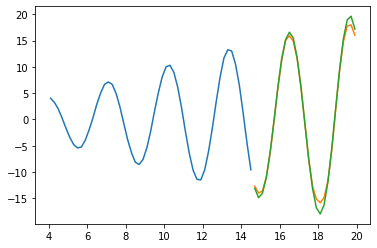

In [23]:
plt.plot(X_train.x, y_train)
plt.plot(X_test.x, y_pred)
plt.plot(X_test.x, y_test)

# Validate

In [24]:
# x_validate = np.arange(3.1, 30, 0.2)
# # Our function
# y_validate = (np.sin(2*x_validate) * x_validate) + np.random.rand(x_validate.size) * 0.2
# val_dataset = pd.DataFrame.from_dict(dict(zip(x_validate.tolist(), y_validate.tolist())), orient='index').reset_index()
# val_dataset.columns = ['x', 'y']
# val_dataset = val_dataset[["y", "x"]]
# test_val = val_dataset
# for i in range(1, 6):
#     test_val = pd.concat([test_val, create_shifted_df(val_dataset, i)], axis=1)
# test_val = test_val.dropna()
# val_df = test_val.tail(40)
# val_df.head(3)

In [25]:
# y_val_pred = model.predict(val_df.drop(['y','x'], axis=1).to_numpy().reshape(val_df.shape[0],1,val_df.shape[1]-2)).reshape(val_df.shape[0])
# y_val_pred

In [26]:
# plt.plot(test_val.x, test_val.y)
# plt.plot(val_df.x, y_val_pred)